<a href="https://colab.research.google.com/github/AnnemarieKeller/MLProject_Imperial/blob/architecture/analysis/WeeklyResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import os

weekno = 5
filepath = f"data/weeklyAddition/week{weekno}SubmissionProcessed"
os.makedirs(filepath, exist_ok=True)

# Construct dynamic URL
url = f"https://raw.githubusercontent.com/AnnemarieKeller/MLProject_Imperial/architecture/data/weeklyAddition/week{weekno}SubmissionProcessed/outputs.txt"

# Download using wget
!wget -O $filepath/outputs.txt $url

all_weeks_array = []
current_line = ""

with open('data/weeklyAddition/week5SubmissionProcessed/outputs.txt', 'r') as f:
    for line in f:
        stripped = line.strip()
        if not stripped:
            continue
        current_line += stripped  # join lines in case of multiline arrays
        if stripped.endswith("]"):  # end of one full list of arrays
            all_weeks_array.append(eval(current_line))
            current_line = ""  # reset for next line

# Example access
print(all_weeks_array[0][0])

all_weeks_array = np.array(all_weeks_array)



--2025-11-10 18:51:27--  https://raw.githubusercontent.com/AnnemarieKeller/MLProject_Imperial/architecture/data/weeklyAddition/week5SubmissionProcessed/outputs.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1284 (1.3K) [text/plain]
Saving to: ‘data/weeklyAddition/week5SubmissionProcessed/outputs.txt’

data/weeklyAddition 100%[===================>]   1.25K  --.-KB/s    in 0s      

2025-11-10 18:51:28 (79.6 MB/s) - ‘data/weeklyAddition/week5SubmissionProcessed/outputs.txt’ saved [1284/1284]

-3.828741202827685e-53


This is to read the Weekly processed Submissions outputs.
As the intent of all the functions is to be maximised, sucess can be inferred by the output increasing or descreasing. Ideally a higher output is wanted to bring progress.

we see the results plotted per function

In [71]:

final   = all_weeks_array[-1, :]  # Values for first week
num_points = all_weeks_array.shape[1] # Values for last week

# Compare final vs initial
improvement = final > initial   # True if value increased
decline     = final < initial   # True if value decreased
no_change   = final == initial  # True if unchanged
action = ''


for i in range(num_points):
    if improvement[i]:
        action = "improved +++"

    elif decline[i]:
        action ='decreased --'
        print(functionOverWeeks)
    else:
        action = "stayed the same <->"

    functionOverWeeks = f"Function {i+1} {action} over {weekno} week{'s' if weekno > 1 else ''}."
    print(functionOverWeeks)

Function 1 improved +++ over 5 weeks.
Function 1 improved +++ over 5 weeks.
Function 2 decreased -- over 5 weeks.
Function 2 decreased -- over 5 weeks.
Function 3 decreased -- over 5 weeks.
Function 3 decreased -- over 5 weeks.
Function 4 decreased -- over 5 weeks.
Function 5 improved +++ over 5 weeks.
Function 6 improved +++ over 5 weeks.
Function 7 improved +++ over 5 weeks.
Function 8 improved +++ over 5 weeks.


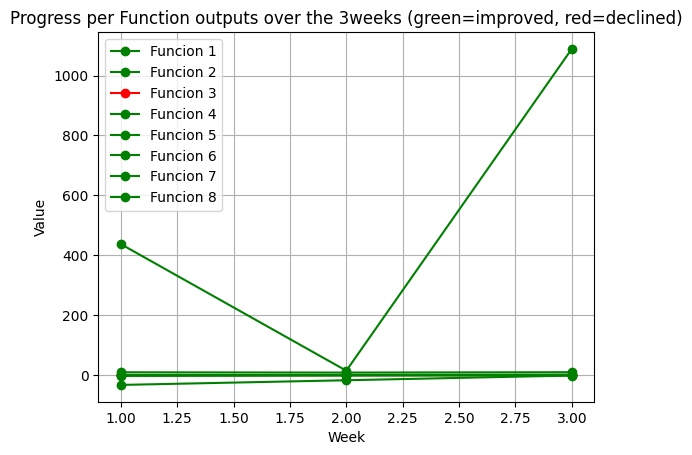

In [44]:
weeks = np.arange(1, all_weeks_array.shape[0] + 1)

for i in range(all_weeks_array.shape[1]):
    color = 'green' if improvement[i] > 0 else 'red'
    plt.plot(weeks, all_weeks_array[:, i], marker='o', color=color, label=f'Funcion {i+1}')

plt.xlabel('Week')
plt.ylabel('Output Value')
plt.title(f"Progress per Function outputs over the {weekno} weeks (green=improved, red=declined)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
We see the increases and decreases per week and can see what functions need to have the current approach revaluated

Overall improvements per function: [ 3.82874120e-53 -4.09472022e-02 -1.57342020e-01 -2.17678060e-01
  1.74377413e+03  1.25105599e+00  1.17302769e+00  2.10269564e-01]
Functions needing immediate attention (worst improvement): [4 3 2 1]
Functions improving the most (best improvement): [8 7 6 5]


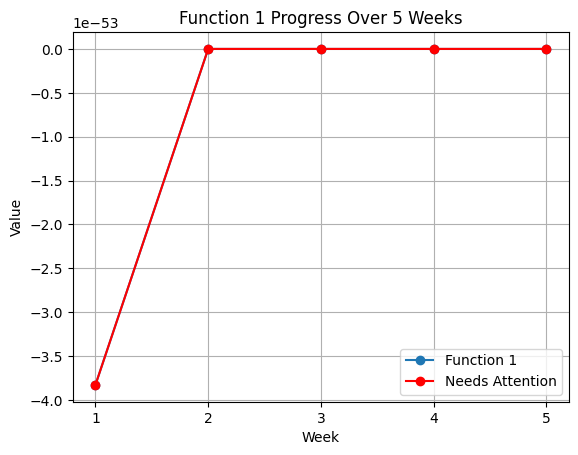

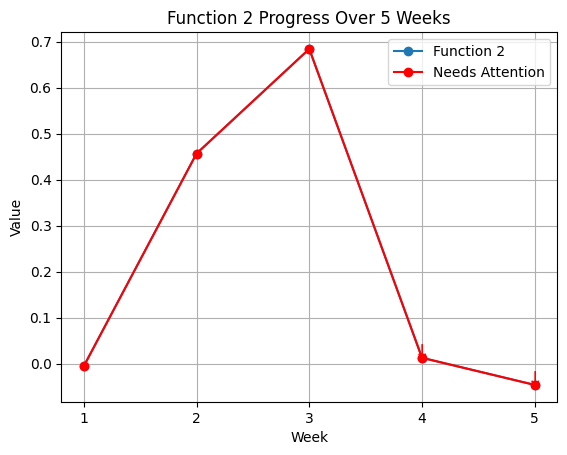

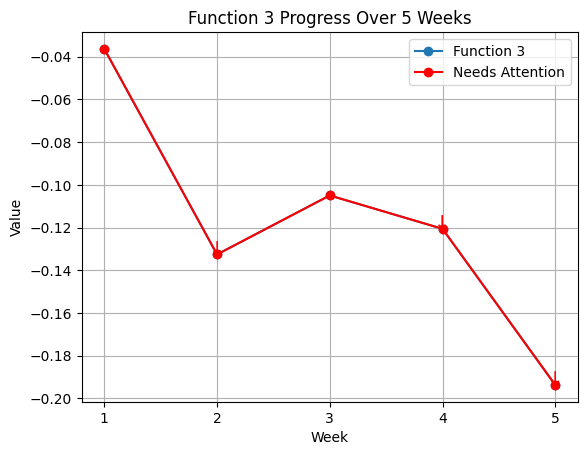

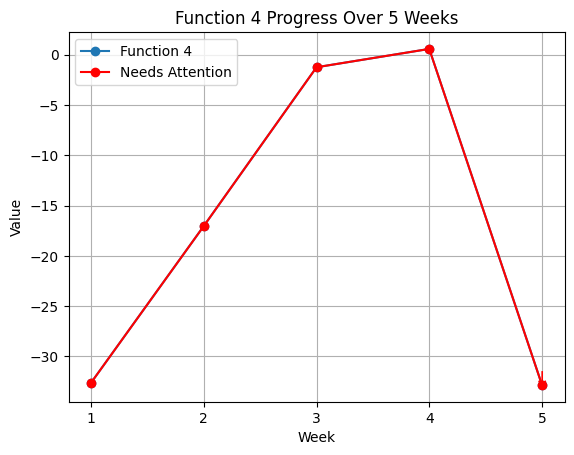

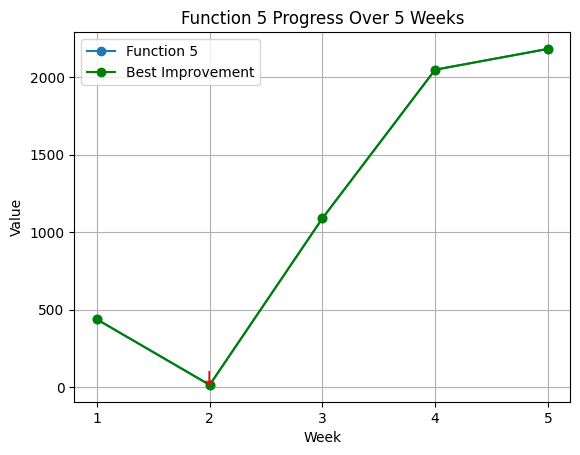

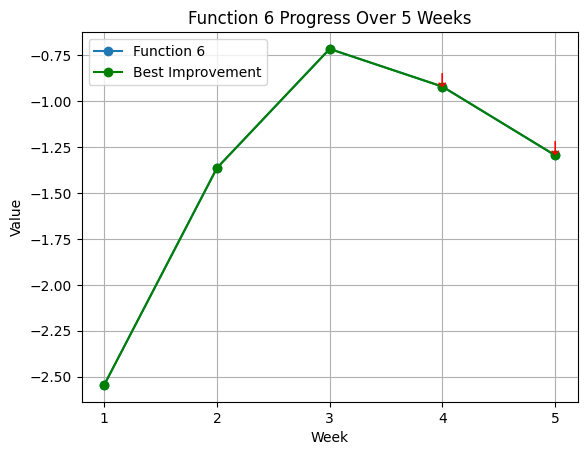

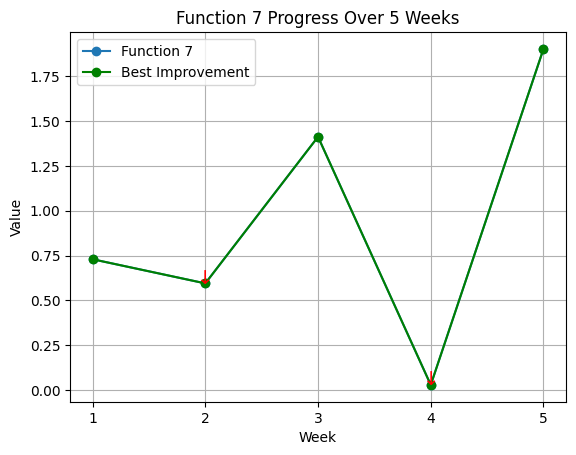

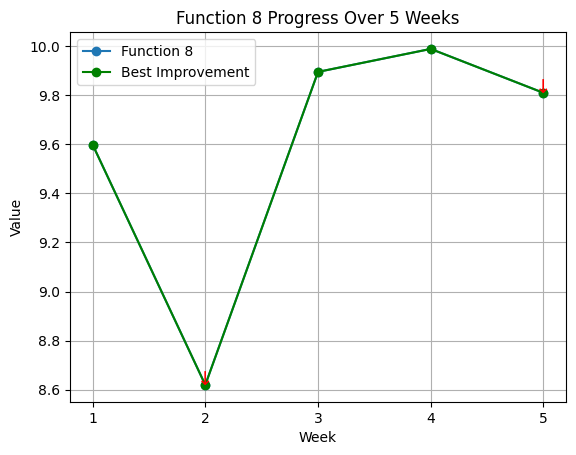

In [75]:
num_weeks, num_functions = all_weeks_array.shape
weeks = np.arange(1, num_weeks + 1)

improvements = all_weeks_array[-1] - all_weeks_array[0]

worst_funcs = np.argsort(improvements)[:4]  # 4 functions with lowest improvement
best_funcs = np.argsort(improvements)[-4:]  # 4 functions with highest improvement

print("Overall improvements per function:", improvements)
print("Functions needing immediate attention (worst improvement):", worst_funcs + 1)
print("Functions improving the most (best improvement):", best_funcs + 1)


for func_idx in range(num_functions):
    plt.figure()
    plt.plot(weeks, all_weeks_array[:, func_idx], marker='o', label=f'Function {func_idx+1}')

    if func_idx in worst_funcs:
        plt.plot(weeks, all_weeks_array[:, func_idx], 'r-o', label='Needs Attention')
    elif func_idx in best_funcs:
        plt.plot(weeks, all_weeks_array[:, func_idx], 'g-o', label='Best Improvement')

    plt.title(f'Function {func_idx + 1} Progress Over {weekno} Weeks')
    plt.xlabel('Week')
    plt.ylabel('Value')
    plt.grid(True)
    plt.xticks(weeks)
    plt.legend()

    # Mark decline points
    weekly_change = np.diff(all_weeks_array[:, func_idx])
    for w, change in enumerate(weekly_change):
        if change < 0:
            plt.annotate('↓', (weeks[w+1], all_weeks_array[w+1, func_idx]), color='red', fontsize=14, ha='center')

    plt.show()

In [29]:
weekly_change = np.diff(all_weeks_array, axis=0)  # shape = (weeks-1, points)


Show the week to week changes per Function

In [76]:

weekly_changes = np.diff(all_weeks_array, axis=0)


func_names = [f"Func_{i+1}" for i in range(all_weeks_array.shape[1])]

for week_idx, changes in enumerate(weekly_changes, start=1):

    changes_print = [float(round(x, 4)) for x in changes]

    declines = [(func_names[i], changes_print[i]) for i in range(len(changes_print)) if changes_print[i] < 0]
    improvements = [(func_names[i], changes_print[i]) for i in range(len(changes_print)) if changes_print[i] > 0]
    unchanged = [(func_names[i], changes_print[i]) for i in range(len(changes_print)) if changes_print[i] == 0]


    declines.sort(key=lambda x: x[1])  # most negative first
    improvements.sort(key=lambda x: x[1], reverse=True)  # largest positive first


    highlight = " <- LAST WEEK" if week_idx == weekly_changes.shape[0] else ""
    print(f"Week {week_idx} -> Week {week_idx+1}{highlight}:")
    print("  Declined:", declines)
    print("  Improved:", improvements)
    print("  Unchanged:", unchanged, "\n")

Week 1 -> Week 2:
  Declined: [('Func_5', -422.4991), ('Func_8', -0.9788), ('Func_7', -0.1347), ('Func_3', -0.0962)]
  Improved: [('Func_4', 15.5913), ('Func_6', 1.1816), ('Func_2', 0.462)]
  Unchanged: [('Func_1', 0.0)] 

Week 2 -> Week 3:
  Declined: []
  Improved: [('Func_5', 1074.063), ('Func_4', 15.7927), ('Func_8', 1.2744), ('Func_7', 0.8176), ('Func_6', 0.6488), ('Func_2', 0.2274), ('Func_3', 0.0276)]
  Unchanged: [('Func_1', 0.0)] 

Week 3 -> Week 4:
  Declined: [('Func_7', -1.3838), ('Func_2', -0.6714), ('Func_6', -0.2051), ('Func_3', -0.0156)]
  Improved: [('Func_5', 958.2103), ('Func_4', 1.8233), ('Func_8', 0.0935)]
  Unchanged: [('Func_1', 0.0)] 

Week 4 -> Week 5 <- LAST WEEK:
  Declined: [('Func_4', -33.425), ('Func_6', -0.3742), ('Func_8', -0.1789), ('Func_3', -0.0731), ('Func_2', -0.0589)]
  Improved: [('Func_5', 133.9999), ('Func_7', 1.874)]
  Unchanged: [('Func_1', 0.0)] 



In [51]:



weekly_change = np.diff(all_weeks_array, axis=0)  # week i -> week i+1

num_points = all_weeks_array.shape[1]

for j in range(num_points):

    decline_values = weekly_change[:, j]
    biggest_decline = np.min(decline_values)

    if biggest_decline < 0:
        week_index = np.argmin(decline_values)  # index of the biggest decline
        print(f"Point {j+1}: Biggest decline = {biggest_decline:.3f} during Week {week_index+1} -> Week {week_index+2}")
    else:
        print(f"Point {j+1}: No decline occurred")

Point 1: No decline occurred
Point 2: No decline occurred
Point 3: Biggest decline = -0.096 during Week 1 -> Week 2
Point 4: No decline occurred
Point 5: Biggest decline = -422.499 during Week 1 -> Week 2
Point 6: No decline occurred
Point 7: Biggest decline = -0.135 during Week 1 -> Week 2
Point 8: Biggest decline = -0.979 during Week 1 -> Week 2


In [72]:
from IPython.display import display, HTML
import numpy as np

weekly_change = np.diff(all_weeks_array, axis=0)  # week i -> week i+1
num_points = all_weeks_array.shape[1]

html_output = ""

for j in range(num_points):
    increase_values = weekly_change[:, j]
    biggest_increase = np.max(increase_values)

    if biggest_increase > 0:
        week_index = np.argmax(increase_values)
        html_output += f"<p style='font-family:Courier; font-size:14px;'>"
        html_output += f"<b>Point {j+1}:</b> Biggest increase = {biggest_increase:.3f} "
        html_output += f"during Week {week_index+1} → Week {week_index+2}</p>"
    else:
        html_output += f"<p style='font-family:Courier; font-size:14px;'>Point {j+1}: No increase occurred</p>"

display(HTML(html_output))


